In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv('Resultsd.csv')

In [43]:
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])

In [44]:
df.set_index('datetime', inplace=True)

In [45]:
hourly_pizza_revenue = df.groupby([df.index.hour, 'pizza_id'])['price'].sum().reset_index()

In [46]:
top_pizzas = hourly_pizza_revenue.groupby('pizza_id')['price'].sum().nlargest(10).index

In [47]:
hourly_pizza_revenue = hourly_pizza_revenue[hourly_pizza_revenue['pizza_id'].isin(top_pizzas)]

In [48]:
hourly_pizza_revenue.columns = ['time', 'pizza_id', 'revenue'] 

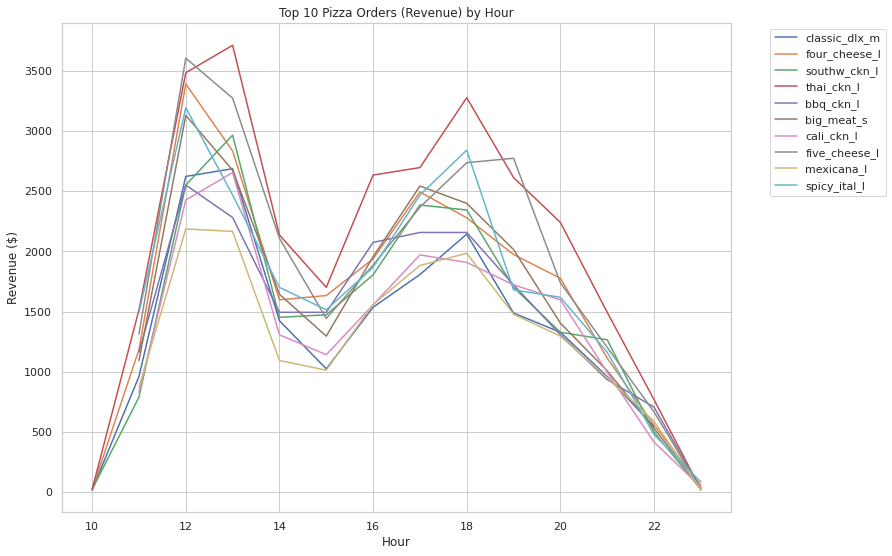

In [49]:
sns.set(rc={'figure.figsize':(12,9)})
sns.set_style("whitegrid")
sns.lineplot(x='time', y='revenue', hue='pizza_id', data=hourly_pizza_revenue)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Top 10 Pizza Orders (Revenue) by Hour')
plt.xlabel('Hour')
plt.ylabel('Revenue ($)')

plt.savefig('CHART8.png', dpi=300, bbox_inches='tight')